In [2]:
from Functions import *
import pandas as pd

gr = pd.read_pickle("greenland_clean.pkl") 
period = [2003,2004]
gr = Graph(gr, period)

/Users/noahbergam/Desktop/GAGA/Functions.py:33: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file( gpd.datasets.get_path("naturalearth_lowres"))


Text(0, 0.5, 'longitude')

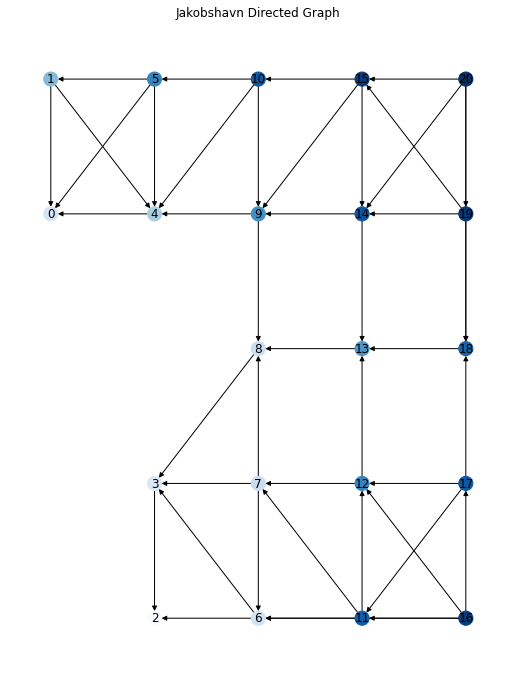

In [23]:
fig, ax = plt.subplots(figsize=(9,12))
#fig.set_figheight(5)
#fig.set_figwidth(10)

r = 5
jakobs = [69.10-r, 69.10+r, -49.5-r, -49.5+r]
gr.bbox_specialize(jakobs)
G, z, pos = gr.digraph(tamed=True,gran=5)

cmap=plt.cm.Blues
nx.draw(G, pos=pos, node_color=z, node_size=200,cmap=cmap,ax=ax,with_labels=True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = max(z), vmax=min(z)))
ax.set_title('Jakobshavn Directed Graph')
ax.set_xlabel('latitude')
ax.set_ylabel('longitude')
#plt.colorbar(sm)

#print(nx.to_numpy_array(G).astype(int))




In [ ]:
def contract():

In [25]:
flow_value, flow_dict = nx.maximum_flow(G, 20, 8,capacity='weight')
path = [8]

nx.draw(G, pos=pos, node_color=z, node_size=200,cmap=cmap,ax=ax,with_labels=True)

In [27]:
flow_value
flow_dict

{0: {},
 1: {0: 0, 4: 0},
 2: {},
 3: {2: 0},
 4: {0: 0},
 5: {0: 0, 1: 0, 4: 0},
 6: {2: 0, 3: 0},
 7: {3: 0, 6: 0, 8: 0},
 8: {3: 0},
 9: {4: 0, 8: 1.0},
 10: {4: 0, 5: 0, 9: 1.0},
 11: {6: 0, 7: 0, 12: 0},
 12: {7: 0, 13: 0},
 13: {8: 1.0},
 14: {9: 0, 13: 0},
 15: {9: 0, 10: 1.0, 14: 0},
 16: {6: 0, 11: 0, 12: 0, 17: 0},
 17: {11: 0, 12: 0, 18: 0},
 18: {13: 1.0},
 19: {14: 0, 15: 0, 18: 0},
 20: {14: 0, 15: 1.0, 18: 1.0, 19: 0}}

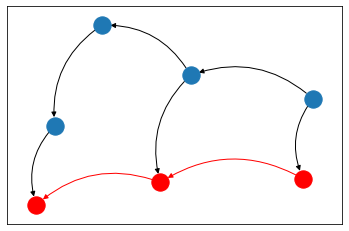

In [7]:
import networkx as nx
import numpy
# let's generate a graph G
#G = nx.gnp_random_graph(20, 0.5)
G = nx.DiGraph()
G.add_edge("x", "a", capacity=3.0)
G.add_edge("x", "b", capacity=1.0)
G.add_edge("a", "c", capacity=3.0)
G.add_edge("b", "c", capacity=5.0)
G.add_edge("b", "d", capacity=4.0)
G.add_edge("d", "e", capacity=2.0)
G.add_edge("c", "y", capacity=2.0)
G.add_edge("e", "y", capacity=3.0)
#flow_value, flow_dict = nx.maximum_flow(G, "x", "y")

#nx.draw(G)
Gr=G
pos = nx.spring_layout(Gr)

# Get shortest path
path = nx.shortest_path(Gr,source='a',target='y')
path_edges = list(zip(path,path[1:]))

# Draw nodes and edges not included in path
nx.draw_networkx_nodes(Gr, pos, nodelist=set(Gr.nodes)-set(path))
nx.draw_networkx_edges(Gr, pos, edgelist=set(Gr.edges)-set(path_edges), connectionstyle='arc3, rad = 0.3')

# Draw nodes and edges included in path
nx.draw_networkx_nodes(Gr, pos, nodelist=path, node_color='r')
nx.draw_networkx_edges(Gr,pos,edgelist=path_edges,edge_color='r', connectionstyle='arc3, rad = 0.3')


In [ ]:
# let networkx return the adjacency matrix A
A = nx.adj_matrix(G)
A = A.todense()
A = numpy.array(A, dtype = numpy.float64)
# let's evaluate the degree matrix D
D = numpy.diag(numpy.sum(A, axis=0))
# ...and the transition matrix T
T = numpy.dot(numpy.linalg.inv(D),A)
# let's define the random walk length, say 10
walkLength = 10
# define the starting node, say the 0-th
p = numpy.array([1] + 19*[0]).reshape(-1,1)
visited = list()
for k in range(walkLength):
    # evaluate the next state vector
    p = numpy.dot(T,p)
    # choose the node with higher probability as the visited node
    visited.append(numpy.argmax(p))

In [1]:
import matplotlib.pyplot as plt
import walker
import networkx as nx
G = nx.random_partition_graph([1000] * 15, .01, .001)

# generate random walks
X = walker.random_walks(G, n_walks=50, walk_len=25)

AttributeError: module 'walker' has no attribute 'random_walks'